In [1]:
#Implemented by Umut Ekin Gezer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import time
import math
import itertools
from itertools import chain
from statistics import mean
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.misc import imread

In [2]:
def clean_default(file_name,test_no):
    
    df=pd.read_csv(file_name,sep='/t')
    df=df["0/New Episode Begins: Default Start;"].str.split('/', expand=True)
    df.columns = ['Step', 'Location', 'Rotation', 'Default_Door']
    df["Trial_Number"] =None
    i=0
    for index, row in df.iterrows():
        if row.Location=="New Episode Begins: Default Start;":
            i=i+1
            df.loc[[index],["Trial_Number"]]=int(i)
        else:
            df.loc[[index],["Trial_Number"]]=int(i)
            
    df=df[df["Trial_Number"] % 2 ==1]
    df["Trial_Number"]=(df["Trial_Number"]+1)/2
    df["Trial_Number"]=df["Trial_Number"].astype(int)
    df=df.drop_duplicates(subset=['Step','Trial_Number'], keep='first')

    #For the Rooms(returns df_room):

    df_room=df[df["Rotation"].isna()]
    df_room=df_room[(df_room.Location != 'New Episode Begins: Default Start;')]
    df_room=df_room[["Location","Trial_Number"]]
    df_room = df_room.drop_duplicates(keep='first')
    df_room['Location'] = df_room['Location'].str.replace(' Room', ' ')
    df_room=df_room.rename(columns={"Location": "Room"})
    df_room['Room'] = df_room['Room'].str.replace('Correct', '')
    df_room['Room'] = df_room['Room'].str.replace('Incorrect', '')
    df_room['Room'] = df_room['Room'].str.replace(';', '')
    df_room['Room'] = df_room['Room'].str.replace(' ', '')
    df_room["Test_Number"]= test_no

    #For the Rotation and Location data
    df_physical=df.dropna()
    df_trial=df_physical["Trial_Number"]
    df_location=df_physical["Location"]
    df_rotation=df_physical["Rotation"]
    df_rotation = df_rotation.map(str).str.replace('(','').str.strip()
    df_rotation = df_rotation.map(str).str.replace(')','').str.strip()
    df_location = df_location.map(str).str.replace('(','').str.strip()
    df_location = df_location.map(str).str.replace(')','').str.strip()
    df_location=df_location.str.split(',', expand=True)
    df_rotation=df_rotation.str.split(',', expand=True)
    df_location.columns = ['X', 'Y', 'Z']
    df_rotation.columns = ['rotation_X', 'rotation_Y', 'rotation_Z']
    df_location = df_location.astype(float)
    df_rotation = df_rotation.astype(float)
    df_location=pd.concat([df_location,df_trial],axis=1)
    df_rotation=pd.concat([df_rotation,df_trial],axis=1)
    df_room.to_csv('Cleaned_data/RoomDefaultTest_'+str(test_no)+'.csv')
    df_location.to_csv('Cleaned_data/LocationDefaultTest_'+str(test_no)+'.csv')
    df_rotation.to_csv('Cleaned_data/RotationDefaultTest_'+str(test_no)+'.csv')
    
    
    return df_room, df_location, df_rotation


    
    

In [3]:
def clean_alternative(file_name,test_no):
    
    df=pd.read_csv(file_name,sep='/t')
    df=df["0/New Episode Begins: Alternative Start;"].str.split('/', expand=True)
    df.columns = ['Step', 'Location', 'Rotation', 'Default_Door']
    df["Trial_Number"] =None
    i=0
    for index, row in df.iterrows():
        if row.Location=="New Episode Begins: Alternative Start;":
            i=i+1
            df.loc[[index],["Trial_Number"]]=int(i)
        else:
            df.loc[[index],["Trial_Number"]]=int(i)
            
    df=df[df["Trial_Number"] % 2 ==1]
    df["Trial_Number"]=(df["Trial_Number"]+1)/2
    df["Trial_Number"]=df["Trial_Number"].astype(int)
    df=df.drop_duplicates(subset=['Step','Trial_Number'], keep='first')

    #For the Rooms(returns df_room):

    df_room=df[df["Rotation"].isna()]
    df_room=df_room[(df_room.Location != 'New Episode Begins: Alternative Start;')]
    df_room=df_room[["Location","Trial_Number"]]
    df_room = df_room.drop_duplicates(keep='first')
    df_room['Location'] = df_room['Location'].str.replace(' Room', ' ')
    df_room=df_room.rename(columns={"Location": "Room"})
    df_room['Room'] = df_room['Room'].str.replace('Correct', '')
    df_room['Room'] = df_room['Room'].str.replace('Incorrect', '')
    df_room['Room'] = df_room['Room'].str.replace(';', '')
    df_room['Room'] = df_room['Room'].str.replace(' ', '')
    df_room["Test_Number"]= test_no

    #For the Rotation and Location data
    df_physical=df.dropna()
    df_trial=df_physical["Trial_Number"]
    df_location=df_physical["Location"]
    df_rotation=df_physical["Rotation"]
    df_rotation = df_rotation.map(str).str.replace('(','').str.strip()
    df_rotation = df_rotation.map(str).str.replace(')','').str.strip()
    df_location = df_location.map(str).str.replace('(','').str.strip()
    df_location = df_location.map(str).str.replace(')','').str.strip()
    df_location=df_location.str.split(',', expand=True)
    df_rotation=df_rotation.str.split(',', expand=True)
    df_location.columns = ['X', 'Y', 'Z']
    df_rotation.columns = ['rotation_X', 'rotation_Y', 'rotation_Z']
    df_location = df_location.astype(float)
    df_rotation = df_rotation.astype(float)
    df_location=pd.concat([df_location,df_trial],axis=1)
    df_rotation=pd.concat([df_rotation,df_trial],axis=1)
    df_room.to_csv('Cleaned_data/RoomAlternativeTest_'+str(test_no)+'.csv')
    df_location.to_csv('Cleaned_data/LocationAlternativeTest_'+str(test_no)+'.csv')
    df_rotation.to_csv('Cleaned_data/RotationAlternativeTest_'+str(test_no)+'.csv')
    
    return df_room, df_location, df_rotation


    
    

In [4]:
#Clean every data:
default_room_test_1,default_location_test_1,default_rotation_test_1=clean_default('Test_1_Default_SR.csv',test_no=1)
alternative_room_test_1,alternative_location_test_1,alternative_rotation_test_1=clean_alternative('Test_1_Alternate_SR.csv',test_no=1)

default_room_test_2,default_location_test_2,default_rotation_test_2=clean_default('Test_2_Default_SR.csv',test_no=2)
alternative_room_test_2,alternative_location_test_2,alternative_rotation_test_2=clean_alternative('Test_2_Alternate_SR.csv',test_no=2)

default_room_test_3,default_location_test_3,default_rotation_test_3=clean_default('Test_3_Default_SR.csv',test_no=3)
alternative_room_test_3,alternative_location_test_3,alternative_rotation_test_3=clean_alternative('Test_3_Alternate_SR.csv',test_no=3)

default_room_test_4,default_location_test_4,default_rotation_test_4=clean_default('Test_4_Default_SR.csv',test_no=4)
alternative_room_test_4,alternative_location_test_4,alternative_rotation_test_4=clean_alternative('Test_4_Alternate_SR.csv',test_no=4)

default_room_test_5,default_location_test_5,default_rotation_test_5=clean_default('Test_5_Default_SR.csv',test_no=5)
alternative_room_test_5,alternative_location_test_5,alternative_rotation_test_5=clean_alternative('Test_5_Alternate_SR.csv',test_no=5)




/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by 

# Heatmap for location:

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



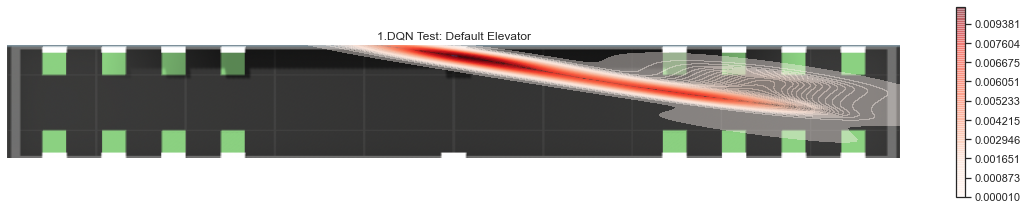

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



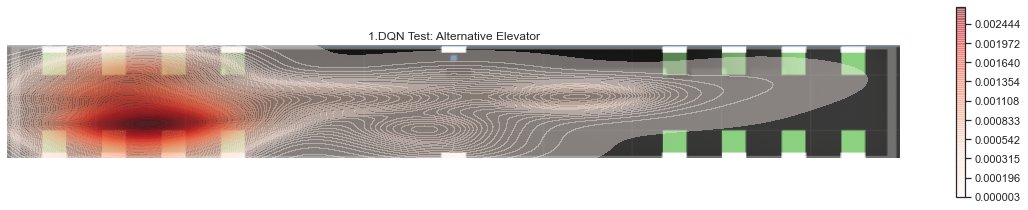

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



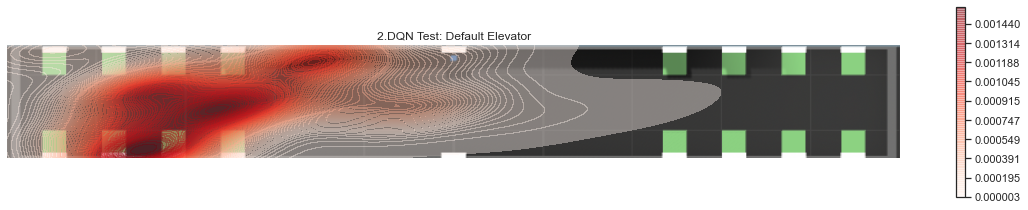

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



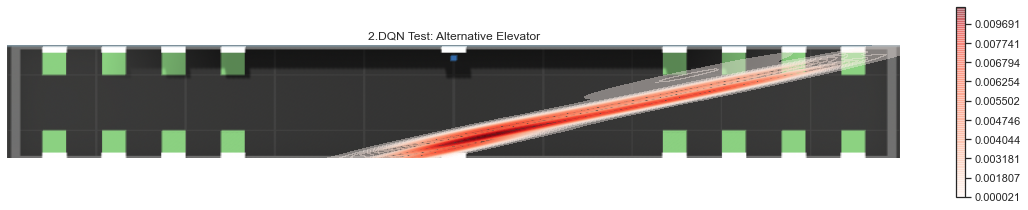

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



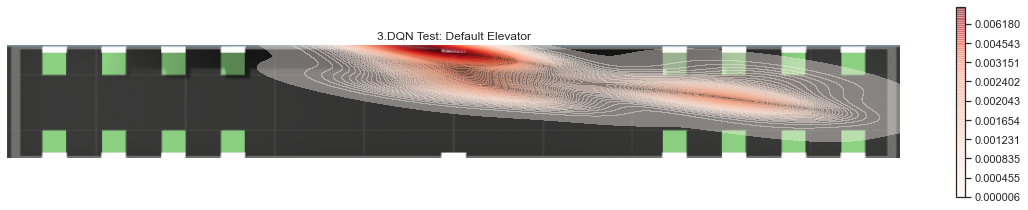

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



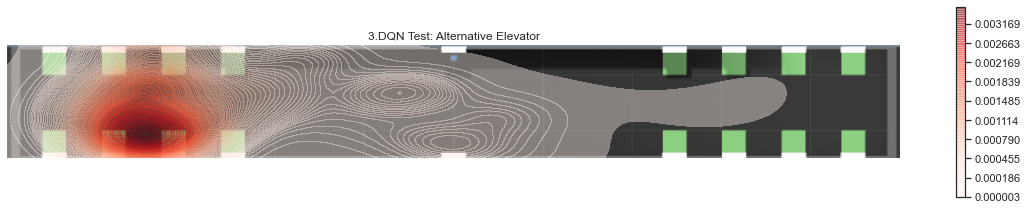

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



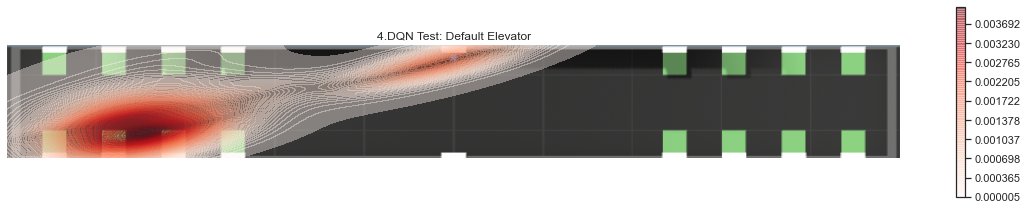

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



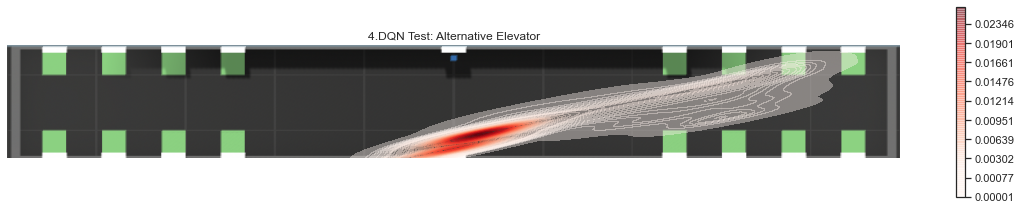

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



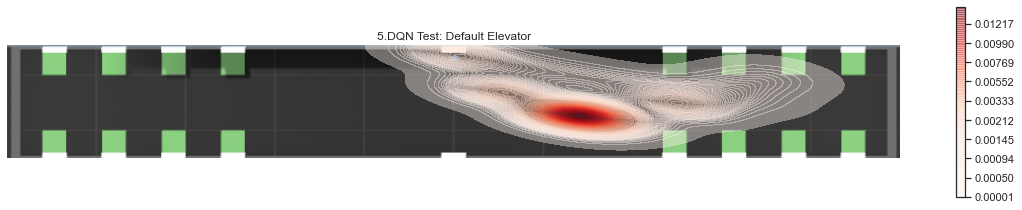

/Users/umutekingezer/opt/anaconda3/envs/unity_rl/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.45 for `bw_method`, but please see the docs for the new parameters and update your code.



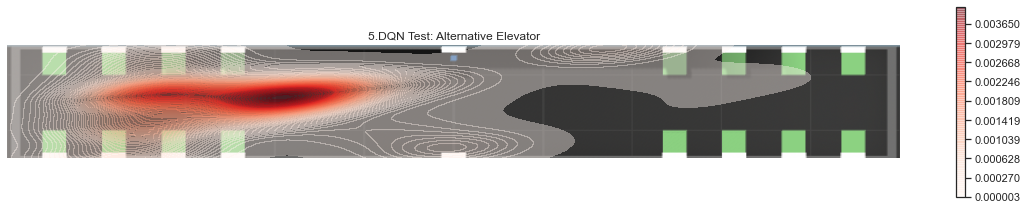

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import seaborn as sns

data_list=[default_location_test_1,alternative_location_test_1,default_location_test_2,alternative_location_test_2,
          default_location_test_3,alternative_location_test_3,default_location_test_4,alternative_location_test_4,
          default_location_test_5,alternative_location_test_5]


default_location_test_1.name="1.SR Test: Common Elevator"
alternative_location_test_1.name="1.SR Test: Uncommon Elevator"
default_location_test_2.name="2.SR Test: Common Elevator"
alternative_location_test_2.name="2.SR Test: Uncommon Elevator"
default_location_test_3.name="3.SR Test: Common Elevator"
alternative_location_test_3.name="3.SR Test: Uncommon Elevator"
default_location_test_4.name="4.SR Test: Common Elevator"
alternative_location_test_4.name="4.SR Test: Uncommon Elevator"
default_location_test_5.name="5.SR Test: Common Elevator"
alternative_location_test_5.name="5.SR Test: Uncommon Elevator"






sns.set(style='white')
for data in data_list:

    plt.figure(figsize=(20, 10))
    hmax = sns.kdeplot(data=data,x="Z",y="X" ,cmap="Reds",shade=True, bw=0.45, thresh=0.001,cbar=True,cbar_kws={"shrink":.35}, alpha=0.4, cut=10,n_levels=100)
    plt.axis('off')
    map_img = mpimg.imread('HER.jpg') 
    plt.imshow(map_img, zorder=0, extent=[75,-75, -9.5, 9.5])
    plt.title(data.name,fontsize=12)
    plt.savefig("imgs/"+data.name+".png",bbox_inches='tight')
    plt.show()

# Room Error Occurences

In [19]:
room_sr=pd.concat([default_room_test_1,alternative_room_test_1,default_room_test_2,alternative_room_test_2,
          default_room_test_3,alternative_room_test_3,default_room_test_4,alternative_room_test_4,
          default_room_test_5,alternative_room_test_5],ignore_index=True)

room_test_sr=pd.concat([default_room_test_1,alternative_room_test_2,
          default_room_test_3,alternative_room_test_4,
          default_room_test_5],ignore_index=True)

room_anomaly_sr=pd.concat([alternative_room_test_1,default_room_test_2,alternative_room_test_3,default_room_test_4,alternative_room_test_5],ignore_index=True)

In [20]:
def f(x):
  if x['Room'] == "310" or x['Room'] == "312" or x['Room'] == "314" or x['Room'] == "316"  : return 'Incorrect Corridor,Incorrect Side'
  elif x['Room'] == "301" or x['Room'] == "303" or x['Room'] == "305" or x['Room'] == "307"  : return 'Correct Corridor ,Correct Side'
  elif x['Room'] == "308" or x['Room'] == "302" or x['Room'] == "304" or x['Room'] == "306"  : return 'Correct Corridor,Incorrect Side'
  else   : return 'Incorrect Corridor,Correct Side'
    
    
  


room_sr['Error_Type'] = room_sr.apply(f, axis=1)
room_test_sr['Error_Type'] = room_test_sr.apply(f, axis=1)
room_anomaly_sr['Error_Type'] = room_anomaly_sr.apply(f, axis=1)

room_sr['Algorithm'] = "SR"
room_test_sr['Algorithm'] = "SR"
room_anomaly_sr['Algorithm'] = "SR"






In [22]:
room_sr.to_csv('SR_test.csv')
room_test_sr.to_csv('SR_trained_test.csv')
room_anomaly_sr.to_csv('SR_notrained_test.csv')

In [6]:
default_room_test_1["Type"]="Default_T1"
alternative_room_test_1["Type"]="Alternative_T1"
default_room_test_2["Type"]="Default_T2"
alternative_room_test_2["Type"]="Alternative_T2"
default_room_test_3["Type"]="Default_T3"
alternative_room_test_3["Type"]="Alternative_T3"


In [7]:
df_room=pd.concat([default_room_test_1,alternative_room_test_1,default_room_test_2,alternative_room_test_2,default_room_test_3,alternative_room_test_3],axis=0,ignore_index=True)



In [8]:

df_room['Room'] = df_room['Room'].str.replace('Correct', '')

In [9]:
df_room['Room'] = df_room['Room'].str.replace('Incorrect', '')

In [10]:
df_room['Room'] = df_room['Room'].str.replace(';', '')

In [11]:
df_room

,Room,Trial_Number,Type
0,303,1,Default_T1
1,303,2,Default_T1
2,303,3,Default_T1
3,303,4,Default_T1
4,303,5,Default_T1
...,...,...,...
465,311,48,Alternative_T3
466,314,49,Alternative_T3
467,312,49,Alternative_T3
468,314,50,Alternative_T3


<AxesSubplot:xlabel='Room'>

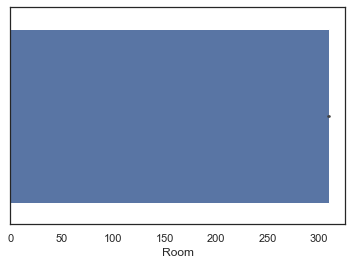

In [12]:
df_room["Room"]=df_room["Room"].astype(int)
sns.barplot(data=df_room,x="Room")

<AxesSubplot:xlabel='Room', ylabel='Count'>

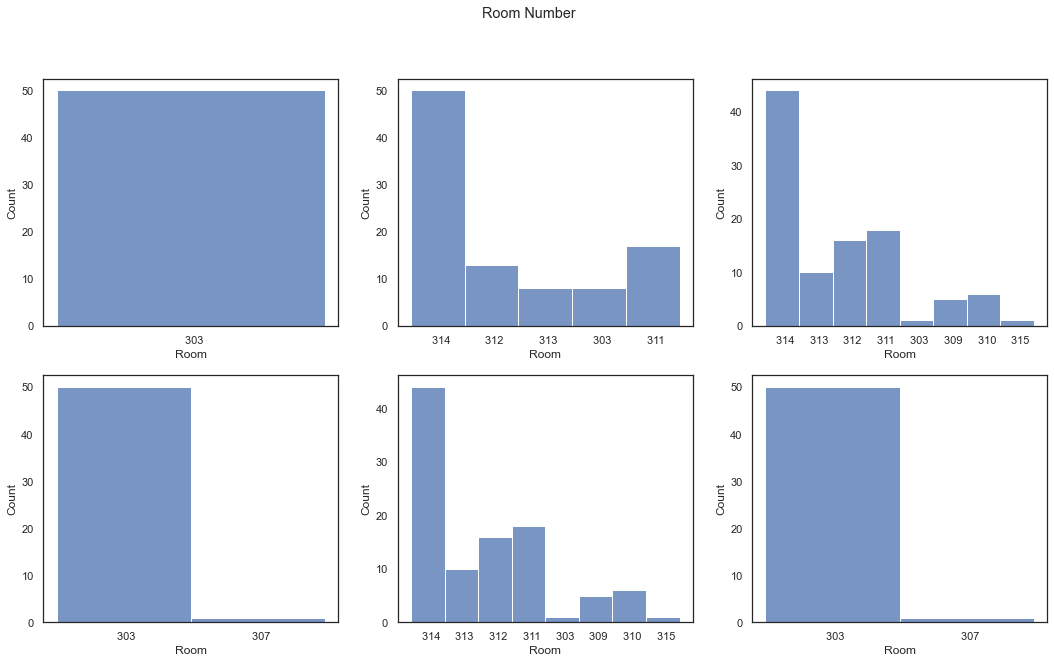

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Room Number')

sns.histplot(ax=axes[0, 0], data=default_room_test_1, x='Room')
sns.histplot(ax=axes[0, 1], data=alternative_room_test_1, x='Room')
sns.histplot(ax=axes[0, 2], data=default_room_test_2, x='Room')
sns.histplot(ax=axes[1, 0], data=alternative_room_test_2, x='Room')
sns.histplot(ax=axes[1, 1], data=default_room_test_2, x='Room')
sns.histplot(ax=axes[1, 2], data=alternative_room_test_2, x='Room')

In [14]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(, "total_bill", "tip", alpha=.7)
g.add_legend()

SyntaxError: invalid syntax (<ipython-input-14-56527fb12667>, line 2)